Consider a Particle Obeying the Wavefunction:
$$ \psi(x)=   \left\{
\begin{array}{ll}
      0 & x<0 \\
      ce^{-\frac{x}{L}} & x\geq0 \\
\end{array} 
\right.  $$
Normalized such that:
$$ \int_{-\infty}^{\infty}|\psi(x)|^2dx = 1$$

From the function definition, we can say:
$$ 1 = \int_{-\infty}^{\infty}|\psi(x)|^2dx 
= \int_{0}^{\infty}c^2e^{-\frac{2x}{L}}dx $$

Thus:
$$ 1 = c^2 [-\frac{L}{2}e^{-\frac{2x}{L}}]\Big|_0^\infty $$

And Finally:
$$ c^2 = \frac{2}{L}

Given  $L = 1nm$, we determine $c = \sqrt{2nm^{-1}}$

The estimated probabilty of the particle being found past 1nm is 0.1352.
The error from the analytical solution is 0.00099962.


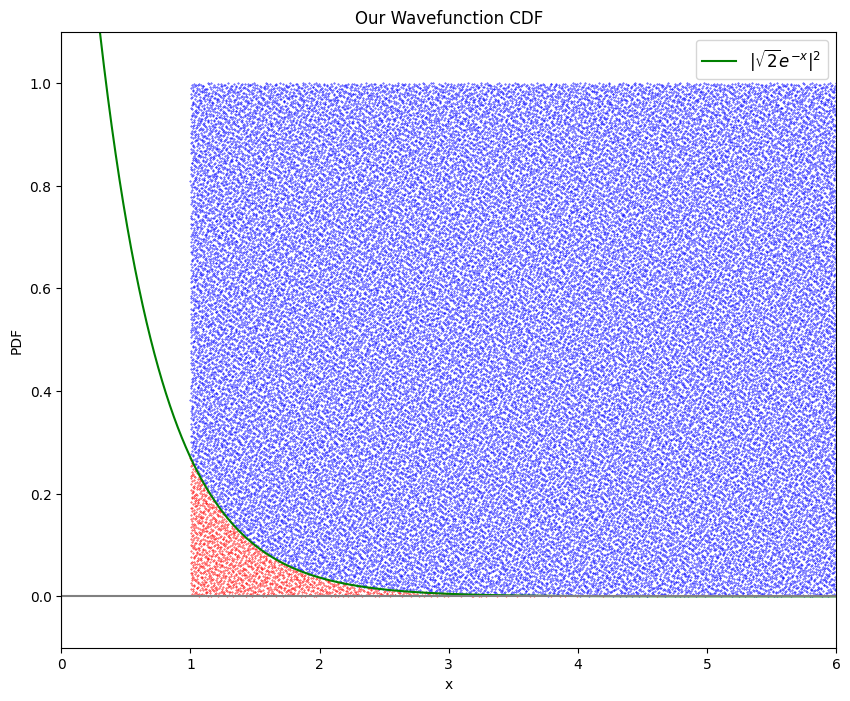

In [16]:
"""particle_location.ipynb"""

# Cell 01 - Monte Carlo Method

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from numba import float64, int64, vectorize


@vectorize([float64(int64, int64)], nopython=True)
def halton(n, p):
    # Here's our function for generating random numbers using the halton sequence
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def f(x):
    # Square of the absolute value of the wavefunction, given L = 1nm
    # and c = sqrt(2)
    return 2 * np.exp(-2 * x)


# Define the sampling area anchored at (1,0) spanning 50 nm in the
# x direction with a height of 1
bbox = Rectangle((1, 0), 5, 1).get_bbox()
total_dots = 50_000

# Sample our points in the x and y domains
x = (1 - halton(np.arange(total_dots), 2)) * bbox.width + bbox.x0
y = (1 - halton(np.arange(total_dots), 3)) * bbox.height + bbox.y0

# Determine the height difference between the function and the y value at
# every point
d = y - f(x)

# Split up the arrays using the d condition
x_in = x[d <= 0.0]
y_in = y[d <= 0.0]
x_out = x[d > 0.0]
y_out = y[d > 0.0]

# Calculate our estimated integral value, compare to analytical
est = (bbox.width * bbox.height) * np.count_nonzero(d <= 0) / total_dots
act = np.exp(-2)  # To get the analytical solution, integrate the PDf from 1 to infinity
err = np.abs((est - act) / act)

# Print our results
print(f"The estimated probabilty of the particle being found past 1nm is {est}.")
print(f"The error from the analytical solution is {err:.8f}.")


# Display the PDF and the Monte Carlo Samples
act_x = np.linspace(0, 6, 10_000)
act_y = f(act_x)

plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_in, color="red", marker=".", s=0.5)
plt.scatter(x_out, y_out, color="blue", marker=".", s=0.5)
plt.plot(act_x, act_y, color="green", label=r"$|\sqrt{2}e^{-x}|^2$")
plt.title("Our Wavefunction CDF")
plt.axhline(0, color="gray")
plt.axvline(0, color="gray")
plt.xlim(0, 6)
plt.ylim(-0.1, 1.1)
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend(loc="upper right", fontsize="12")
plt.show()

In [23]:
# Cell 02 - Scipy numerical integration method

import scipy.integrate
from sympy import oo

# Estimate the integral using scipy's quad, then compare with analytical
cdf_estimate = scipy.integrate.quad(f, 1, oo)[0]
scipy_err = np.abs((cdf_estimate - act) / act)

print(f"The probability as numerically estimated by scipy is {cdf_estimate:.4f}.")
print(f"The error in this estimate is {scipy_err:.20f}.")

The probability as numerically estimated by scipy is 0.1353.
The error in this estimate is 0.00000000000000041018.
